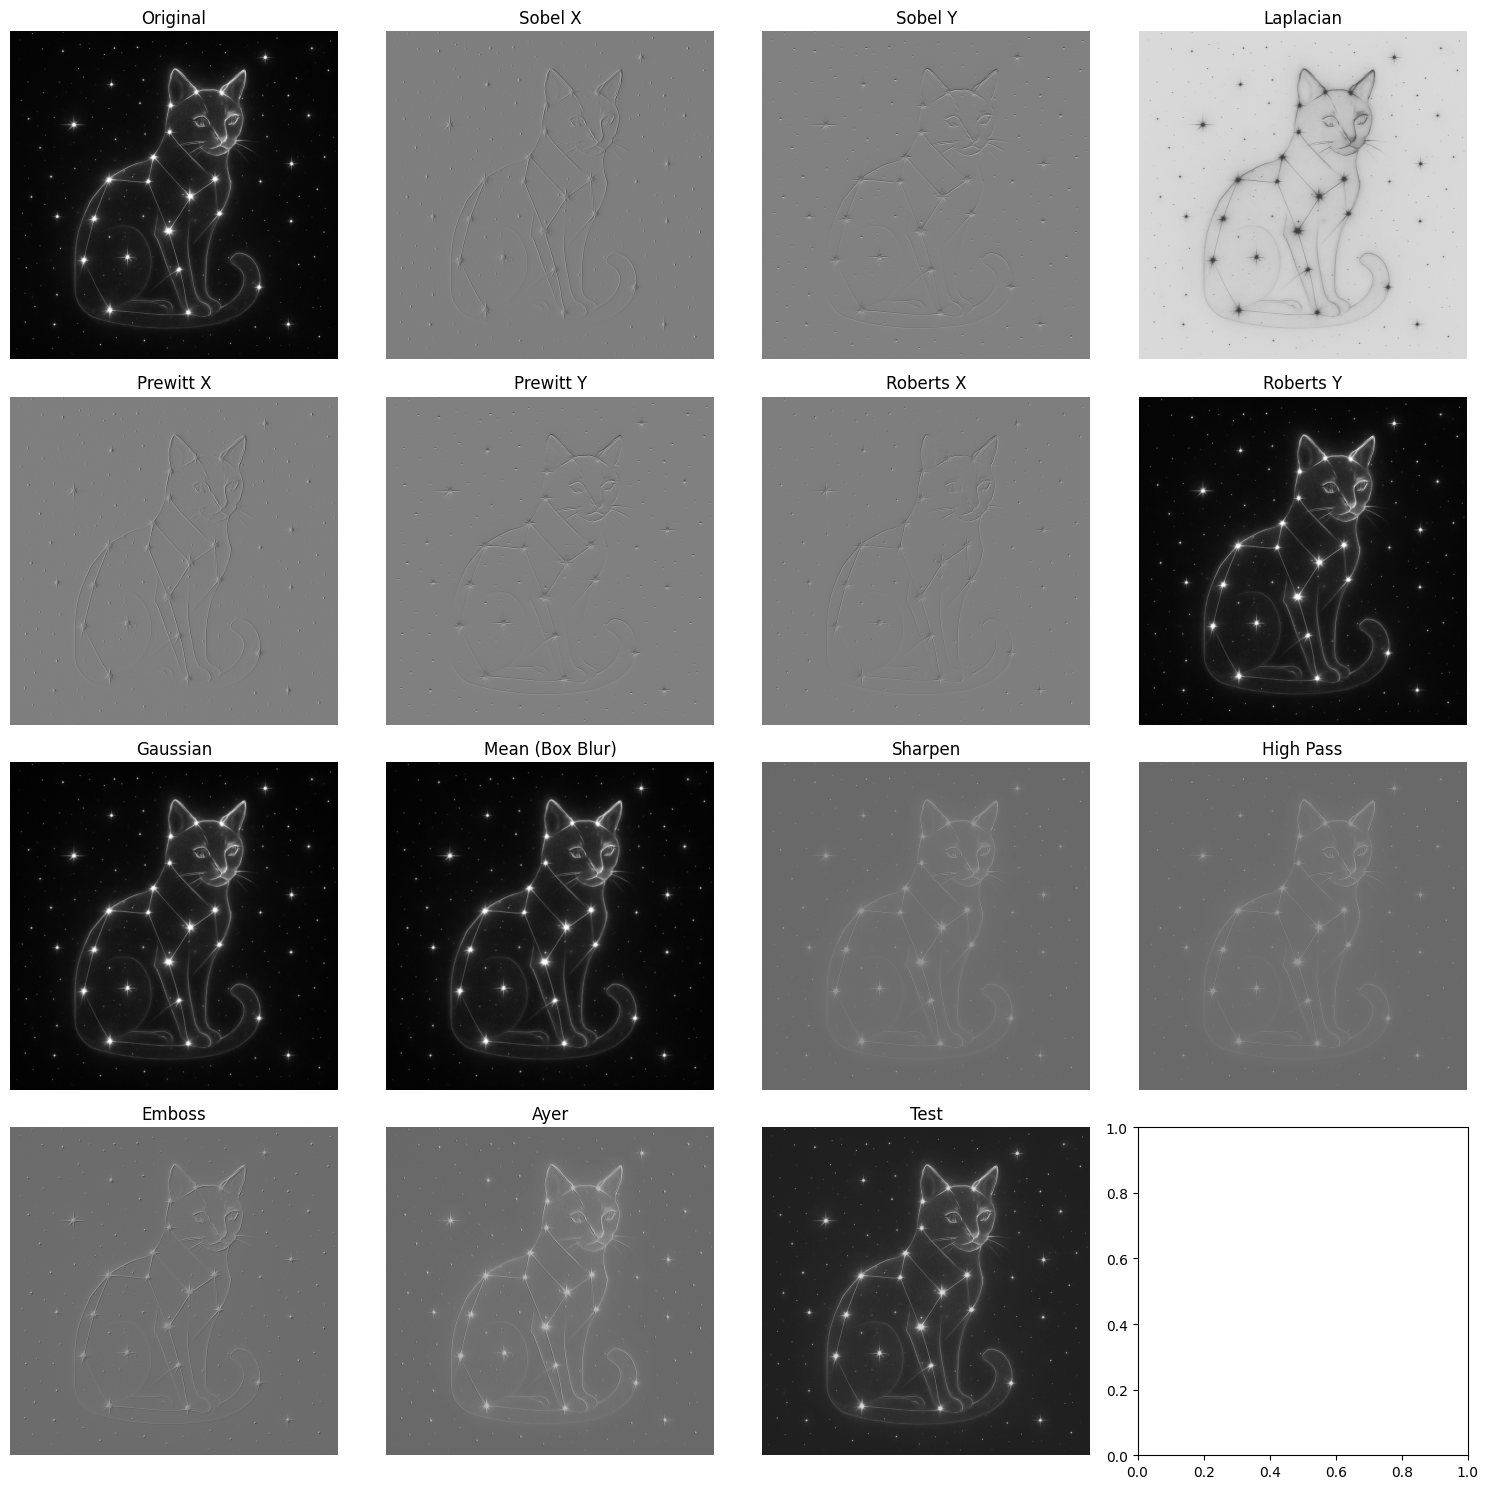

In [10]:
import torch
import torch.nn.functional as F
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("cat-constelation.jpg").convert("L")
transform = T.Compose([T.ToTensor(), lambda x: x.unsqueeze(0)])
img_tensor = transform(img)

# Diccionario de filtros

kernels = {
    "Sobel X": torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32),
    "Sobel Y": torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=torch.float32),
    "Laplacian": torch.tensor([[0, 1, 0], [-1, -4, -1], [0, 1, 0]], dtype=torch.float32),
    "Prewitt X": torch.tensor([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=torch.float32),
    "Prewitt Y": torch.tensor([[1, 1, 1], [0, 0, 0], [-1, -1, - 1]], dtype=torch.float32),
    "Roberts X": torch.tensor([[1, 0], [0, -1]], dtype=torch.float32),
    "Roberts Y": torch.tensor([[0, 1], [1, 0]], dtype=torch.float32),
    "Gaussian": torch.tensor([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=torch.float32) / 16.0,
    "Mean (Box Blur)": torch.tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=torch.float32) / 9.0,
    "Sharpen": torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32),
    "High Pass": torch.tensor([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=torch.float32),
    "Emboss": torch.tensor([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], dtype=torch.float32),
    "Ayer": torch.tensor([[0.25, 0, -0.25], [0.5, 0, -0.5], [0.25, 0, 0.25]], dtype=torch.float32),
    "Test": torch.tensor([[-1, 0, 0], [0, 10, 0], [0, 0, -1]], dtype=torch.float32)
}

def aplicar_filtro(img_tensor, kernel):
    # Asegurarse de que el kernel tenga la forma correcta
    kernel = kernel.unsqueeze(0).unsqueeze(0)  # Añadir dimensiones de batch y canal
    # Aplicar el filtro usando F.conv2d
    return F.conv2d(img_tensor, kernel, padding=1)

fig, axs = plt.subplots(4, 4, figsize=(15, 15))
axs = axs.flatten()

axs[0].imshow(img_tensor.squeeze().detach().numpy(), cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

# Aplicar los filtros y mostrar los resultados
for i, (nombre, kernel) in enumerate(kernels.items(), start=1):
    resultado = aplicar_filtro(img_tensor, kernel)
    resultado = resultado.squeeze().detach().numpy()  # Eliminar dimensiones adicionales y convertir a numpy
    axs[i].imshow(resultado, cmap='gray')
    axs[i].set_title(nombre)
    axs[i].axis('off')
plt.tight_layout()
plt.show()

# Aplicar los filtros
